C:\Users\Director UYE\Anaconda2\envs\py35\lib\site-packages\sklearn\preprocessing\data.py:167: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


[ 1075.65535965  1090.60398427  1104.70220604  1099.36817558  1092.81024135
  1090.1880627   1088.83635117  1085.84709174  1079.35492374  1074.92361769
  1072.86048891  1091.80402714  1110.0860092   1114.79857082  1129.85418186
  1133.82523208  1132.67228768  1130.18756163  1132.04540806  1149.97744056
  1148.54247601  1159.70699128  1156.10175745  1163.96392972  1183.59399289
  1196.37701215  1190.13538636  1202.67000926  1208.47559257  1205.67492063
  1196.49460087  1202.60272041  1200.89654239  1136.49307953  1081.23767263] 0.974829529115 35


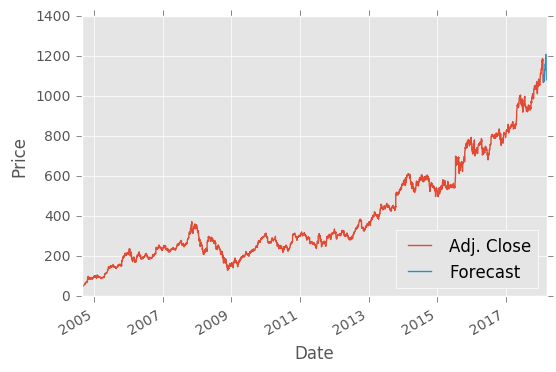

In [89]:
import pandas as pd
import quandl, math, datetime
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, cross_validation, svm
import matplotlib.pyplot as plt
from matplotlib import style
#%matplotlib inline

style.use('ggplot')

df = quandl.get('WIKI/GOOGL')

df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100
df['PCT_Change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Close'] * 100
df = df[['Adj. Close','HL_PCT', 'PCT_Change', 'Adj. Volume']]
df.head()

forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)

forecast_out = int(math.ceil(0.01*len(df)))

df['label'] = df[forecast_col].shift(-forecast_out)


X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X)

X = X[:-forecast_out]
X_lately = X[-forecast_out:]


df.dropna(inplace=True)

y = np.array(df['label'])
y = np.array(df['label'])


X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)

forecast_set = clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out)

df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]
    
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


## 